## Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

## Reading the dataset

In [2]:
data=pd.read_csv("C:/Users/Administrator/Desktop/diabetes.csv")

NameError: ignored

## Checking the information of the dataset
It has 9 columns and 768 Rows.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking the statistical measurres in our data set

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Out of 768 Entries. 500 are not affected by the disease and 268 are diabetic patient

## Plotting the number of diabetic and non diabetic patients

The number of non diabetic patients 500
The number of diabetic patients 268


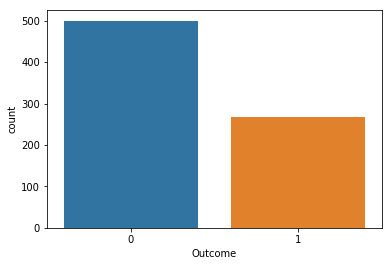

In [ ]:
sns.countplot(data=data,x="Outcome",label="count")

patient,not_patient=data["Outcome"].value_counts()
print("The number of non diabetic patients",patient)
print("The number of diabetic patients",not_patient)

## Few rows in these columns are zero so changing them to the mean value as it's not possible to have zero for those columns

In [ ]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
mean_glucose=round(data["Glucose"].mean(),0)
data["Glucose"]=data["Glucose"].fillna(mean_glucose)
print(mean_glucose)

mean_bp=round(data["BloodPressure"].mean(),0)
data["BloodPressure"]=data["BloodPressure"].fillna(mean_bp)
print(mean_bp)

mean_st=round(data["SkinThickness"].mean(),0)
data["SkinThickness"]=data["SkinThickness"].fillna(mean_st)
print(mean_st)

mean_insulin=round(data["Insulin"].mean(),0)
data["Insulin"]=data["Insulin"].fillna(mean_insulin)
print(mean_insulin)

mean_bmi=round(data["BMI"].mean(),0)
data["BMI"]=data["BMI"].fillna(mean_bmi)
print(mean_bmi)

122.0
72.0
29.0
156.0
32.0


## Checking missing values

In [ ]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.688802,72.386719,29.108073,155.768229,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435959,12.096642,8.791221,85.021408,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,156.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Checking for outliers in the dataset
The dataset has outliers, especially in the insulin column.. But, we don't treat them as it's a medical dataset 

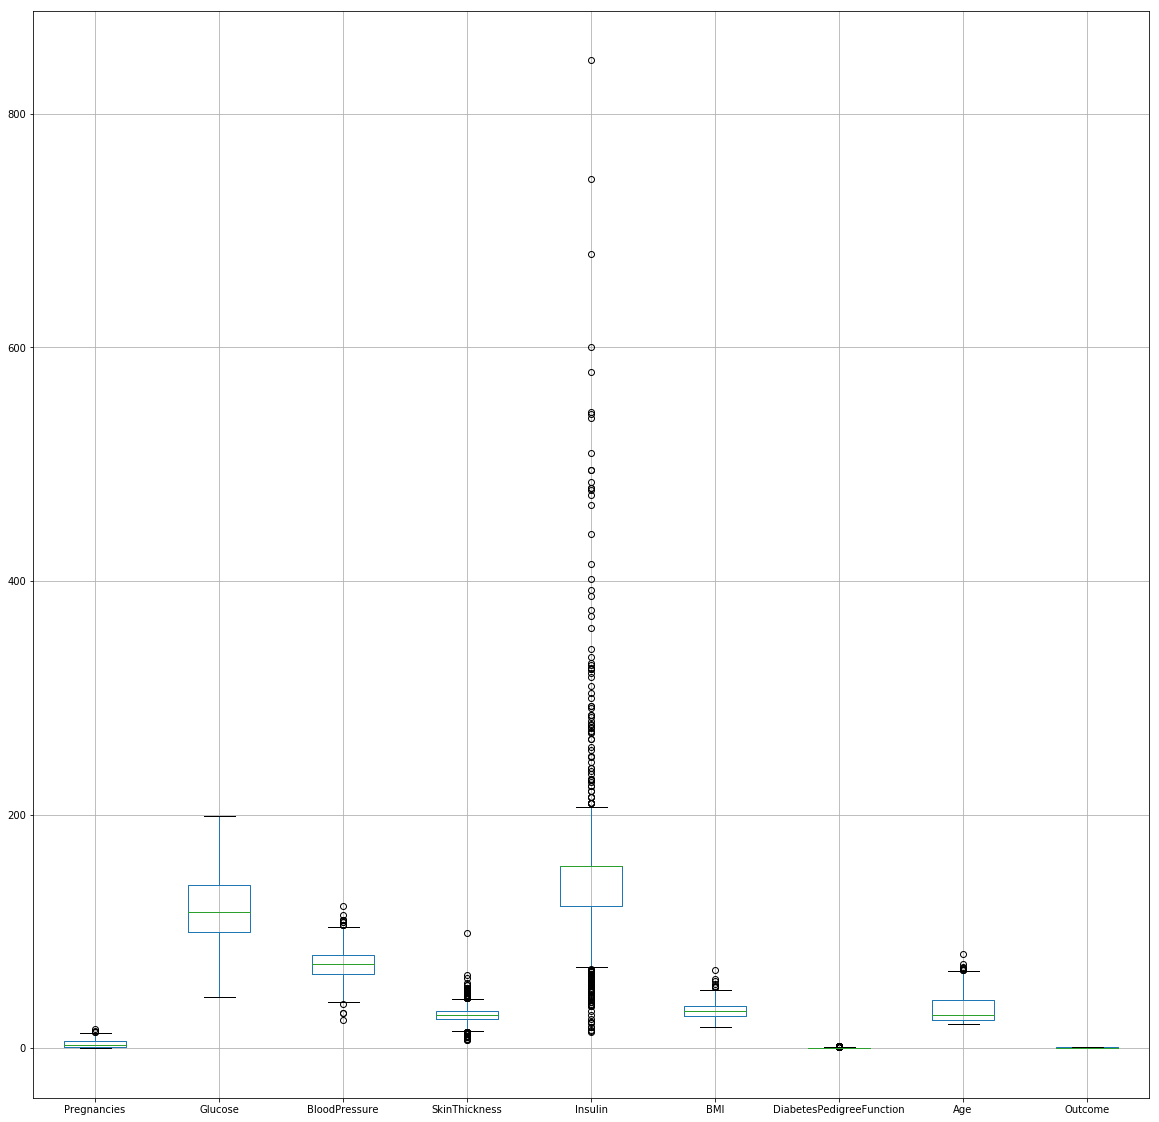

In [ ]:
data.boxplot(figsize=(20,20))

## Checking distribution of each column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000058F6392B0>,
      dtype=object)

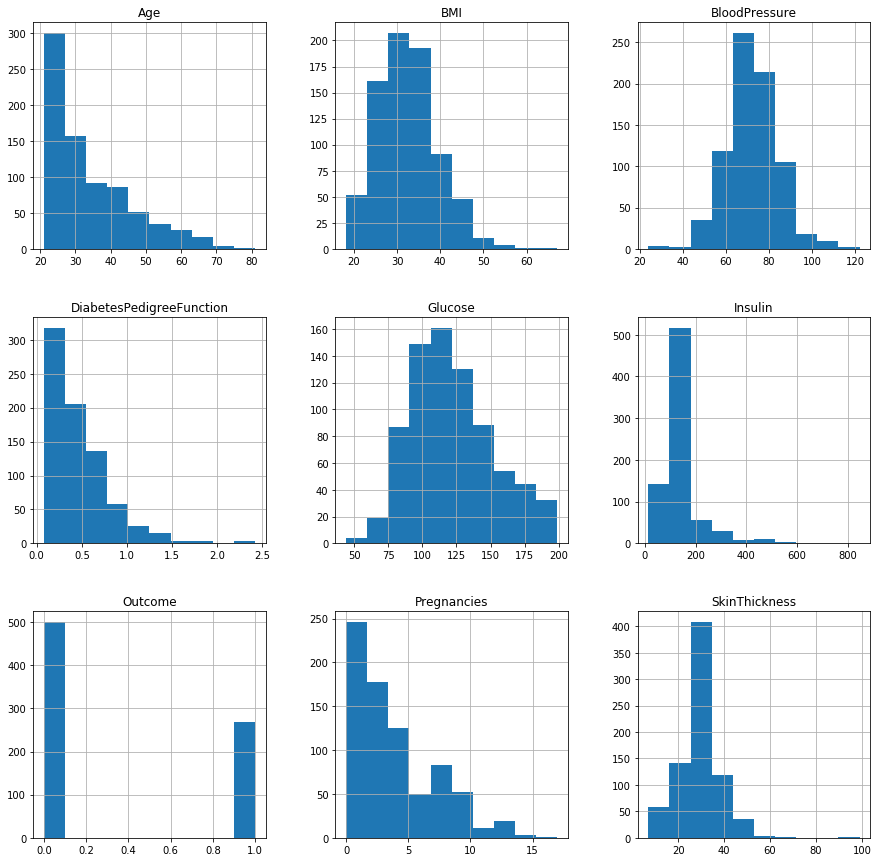

In [ ]:
data.hist(grid=True,figsize=(15,15))

## Plotting the scalar matrix

In [1]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal='kde')

NameError: ignored

## Checking for correlation

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127891,0.208615,0.081770,0.056479,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127891,1.000000,0.218530,0.192690,0.420052,0.231484,0.137041,0.266507,0.492935
BloodPressure,0.208615,0.218530,1.000000,0.191892,0.072906,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192690,0.191892,1.000000,0.158134,0.543275,0.102188,0.126107,0.214873
Insulin,0.056479,0.420052,0.072906,0.158134,1.000000,0.166403,0.098191,0.137296,0.214519
BMI,0.021546,0.231484,0.281132,0.543275,0.166403,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137041,-0.002378,0.102188,0.098191,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266507,0.324915,0.126107,0.137296,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492935,0.165723,0.214873,0.214519,0.312249,0.173844,0.238356,1.000000


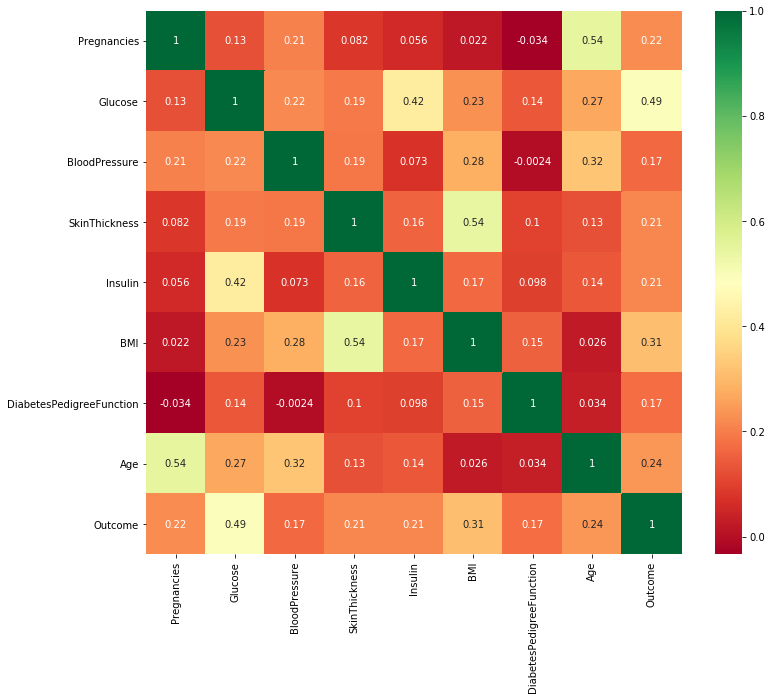

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

### There is no correlation between columns hence we consider all the columns

## Is Age influencing the diabetes?

## Plotting age distribution

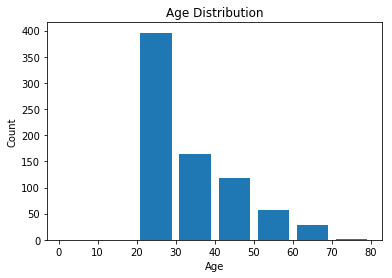

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.hist(data["Age"], bins, histtype='bar', rwidth=0.8)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

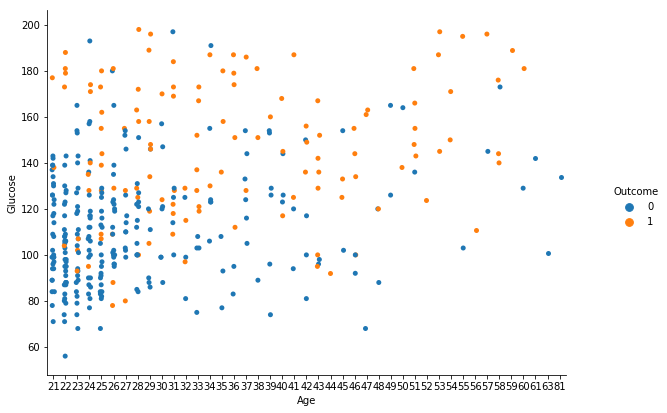

In [ ]:
g = sns.catplot(x="Age", y="Glucose", hue="Outcome", data=data.query("Insulin != 156.0"));
g.fig.set_figheight(6)
g.fig.set_figwidth(10)

#### The above plot shows there is no correlation between Age and Diabetes, as there is no specific pattern to suggest that

## Does Insulin and Glucose play an important role in Diabetes?

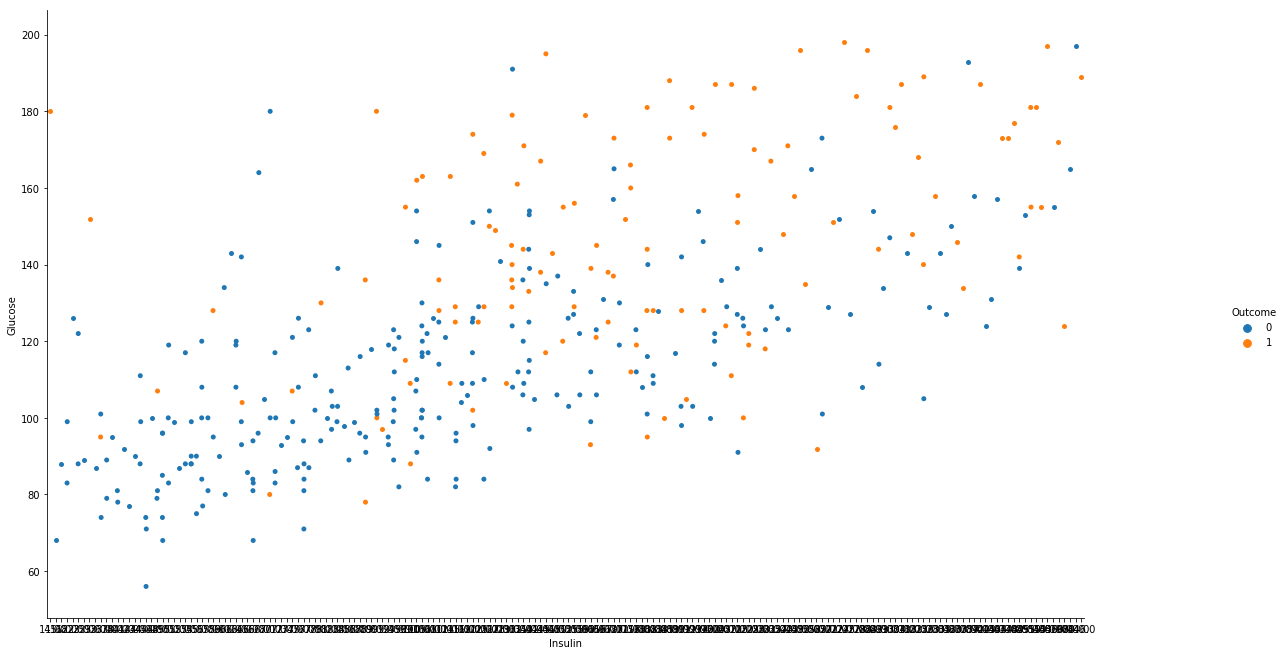

In [ ]:
g = sns.catplot(x="Insulin", y="Glucose", hue="Outcome", data=data.query("Insulin != 156.0"));
g.fig.set_size_inches(20,10)

## From the  above graph it's quite  understandable that as the Glucose and Insulin levels increase there's a high chance of having diabetes

## Machine Learning

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

C:\Users\Administrator\Anaconda3.0\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Splitting the dataset

In [ ]:
predictor= data.iloc[:, data.columns != 'Outcome'].values
target= data.iloc[:, data.columns == 'Outcome'].values

## Scaling Data

In [ ]:
# Standarize features
scaler = StandardScaler()
predictor = scaler.fit_transform(predictor)

## K Fold cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=2)
kf.get_n_splits(predictor)

print(kf)

KFold(n_splits=2)
for train_index, test_index in kf.split(predictor):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = predictor[train_index], predictor[test_index]
    y_train, y_test = target[train_index], target[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)


## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Administrator\Anaconda3.0\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(x_test)
y_pred=pd.DataFrame(y_pred)
accuracy_score(y_test,y_pred)

0.8046875

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[234,  27],
       [ 48,  75]], dtype=int64)

In [ ]:
sensitivity=cm[0,0]/(cm[0,0]+cm[1,0])
sensitivity

0.8297872340425532

## SVM

In [ ]:
model = SVC(kernel='linear')
model = model.fit(x_train,y_train)


C:\Users\Administrator\Anaconda3.0\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = model.predict(x_test)
y_pred=pd.DataFrame(y_pred)
accuracy_score(y_test,y_pred)

0.7994791666666666

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[238,  23],
       [ 54,  69]], dtype=int64)

In [ ]:
sensitivity=cm[0,0]/(cm[0,0]+cm[1,0])
sensitivity

0.815068493150685

## Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
y_pred = model.predict(x_test)
y_pred=pd.DataFrame(y_pred)
accuracy_score(y_test,y_pred)

0.7447916666666666

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[208,  53],
       [ 45,  78]], dtype=int64)

In [ ]:
sensitivity=cm[0,0]/(cm[0,0]+cm[1,0])
sensitivity

0.8221343873517787

## Random Forest

In [ ]:
model=RandomForestClassifier(n_estimators=200, bootstrap=True)
model.fit(x_train, y_train)

C:\Users\Administrator\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
y_pred = model.predict(x_test)
y_pred=pd.DataFrame(y_pred)
accuracy_score(y_test,y_pred)

0.7708333333333334

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[228,  33],
       [ 55,  68]], dtype=int64)

In [ ]:
sensitivity=cm[0,0]/(cm[0,0]+cm[1,0])
sensitivity

0.8056537102473498

## XGBoost

In [ ]:
model = xgb.XGBClassifier(n_estimators=200)
model.fit(x_train, y_train)

C:\Users\Administrator\Anaconda3.0\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3.0\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=200, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [ ]:
y_pred = model.predict(x_test)
y_pred=pd.DataFrame(y_pred)
accuracy_score(y_test,y_pred)

C:\Users\Administrator\Anaconda3.0\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7213541666666666

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[210,  51],
       [ 56,  67]], dtype=int64)

In [ ]:
sensitivity=cm[0,0]/(cm[0,0]+cm[1,0])
sensitivity

0.7894736842105263

## From the above models LR seems to be best as it's accuracy is good and has the best Sensitivity